XGBoost Tutorial Part2 https://xgboost.readthedocs.io/en/stable/tutorials/

1. Prediction Options

In [2]:
# https://xgboost.readthedocs.io/en/stable/python/python_api.html  https://xgboost.readthedocs.io/en/stable/prediction.html
# predict(data, output_margin=False, ntree_limit=0, pred_leaf=False, pred_contribs=False, approx_contribs=False,
#         pred_interactions=False, validate_features=True, training=False, iteration_range=(0, 0), strict_shape=False)


In [3]:
import xgboost as xgb
#1. data (DMatrix) – The dmatrix storing the input.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)

#NB The parser in XGBoost has limited functionality. When using Python interface, it’s recommended to use pandas read_csv or other similar utilites than XGBoost’s builtin parser.

d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_test, y_test)


# Params with Dart.
params = {'booster': 'dart',
         'max_depth': 5, 'learning_rate': 0.1,
         'num_class': 3, 'objective': 'multi:softmax', #for multicalss classification
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}
num_round = 50

bst_dart = xgb.train(params, d_train, num_round)
preds_dart = bst_dart.predict(d_test)
preds_dart

array([1., 2., 1., 1., 0., 2., 1., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0.,
       1., 1., 2., 0., 1., 2., 1., 0., 2., 0., 1., 1., 0.], dtype=float32)

In [4]:
#2. output_margin – Whether to output the raw untransformed margin value, with strict_shape = True.
preds_margin = bst_dart.predict(d_test, output_margin=True, strict_shape=True)
preds_margin

array([[-1.2311192 ,  2.658139  , -1.1970838 ],
       [-1.2311192 , -1.1247844 ,  2.5995476 ],
       [-1.2311192 ,  2.658139  , -1.1970838 ],
       [-1.2311192 ,  2.658139  , -0.7862025 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [-1.2311192 , -0.05469897,  2.3609068 ],
       [-1.2311192 ,  2.658139  , -0.7862025 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [-1.2311192 ,  2.6568894 , -1.1949627 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [-1.2311192 , -1.1247844 ,  2.5995476 ],
       [ 2.6029608 , -1.0792562 , -1.1970838 ],
       [-1.2311192 ,  2.658139  , -1.1970838 ],
       [-1.2311192 ,  1.4159154 ,  0.7698035 ],
       [-1.2311192 , -1.1247844 ,  2.5995476 ],
       [ 2.6029608 , -1.0792562 , -1.197

In [5]:
#3. pred_leaf, pred_contribs - Used for shaping, with strict_shape = True.
preds_margin_leaf = bst_dart.predict(d_test, pred_leaf=True, strict_shape=True)
preds_margin_leaf

array([[[[2.],
         [5.],
         [3.]],

        [[2.],
         [5.],
         [3.]],

        [[2.],
         [5.],
         [3.]],

        ...,

        [[2.],
         [8.],
         [3.]],

        [[2.],
         [8.],
         [3.]],

        [[2.],
         [8.],
         [3.]]],


       [[[2.],
         [8.],
         [2.]],

        [[2.],
         [8.],
         [2.]],

        [[2.],
         [8.],
         [6.]],

        ...,

        [[2.],
         [2.],
         [6.]],

        [[2.],
         [2.],
         [6.]],

        [[2.],
         [2.],
         [6.]]],


       [[[2.],
         [5.],
         [3.]],

        [[2.],
         [5.],
         [3.]],

        [[2.],
         [5.],
         [3.]],

        ...,

        [[2.],
         [8.],
         [3.]],

        [[2.],
         [8.],
         [3.]],

        [[2.],
         [8.],
         [3.]]],


       ...,


       [[[2.],
         [5.],
         [3.]],

        [[2.],
         [5.],
         [3.]],

In [6]:
#3. pred_contribs
preds_margin_contribs = bst_dart.predict(d_test, pred_contribs=True, strict_shape=True)
preds_margin_contribs

array([[[ 0.00000000e+00,  0.00000000e+00, -1.56709540e+00,
          0.00000000e+00,  3.35976183e-01],
        [ 4.22699489e-02,  1.60666943e-01,  1.20104158e+00,
          7.15902269e-01,  5.38258314e-01],
        [-1.89942215e-03, -2.87174247e-02, -7.49574363e-01,
         -1.01320517e+00,  5.96312344e-01]],

       [[ 0.00000000e+00,  0.00000000e+00, -1.56709540e+00,
          0.00000000e+00,  3.35976183e-01],
        [-1.63391698e-02,  1.01938359e-01, -8.50964069e-01,
         -8.97677720e-01,  5.38258314e-01],
        [-5.84893860e-05, -4.88778986e-02,  9.41195846e-01,
          1.11097550e+00,  5.96312344e-01]],

       [[ 0.00000000e+00,  0.00000000e+00, -1.56709540e+00,
          0.00000000e+00,  3.35976183e-01],
        [ 7.90567920e-02,  4.64898385e-02,  1.18752658e+00,
          8.06807220e-01,  5.38258314e-01],
        [-4.07565478e-03, -1.13523807e-02, -7.42205083e-01,
         -1.03576326e+00,  5.96312344e-01]],

       [[ 0.00000000e+00,  0.00000000e+00, -1.56709540e+00

In [7]:
#4. ntree_limit (int) – Deprecated, use iteration_range instead.
preds_margin_ntree = bst_dart.predict(d_test, ntree_limit=True)
preds_margin_ntree

e:\KULIKOV\ML\MLCourseAI\MLCourseAI\.venv\Lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


array([1., 2., 1., 1., 0., 2., 1., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0.,
       1., 2., 2., 0., 1., 2., 1., 0., 2., 0., 1., 1., 0.], dtype=float32)

In [8]:
#5. approx_contribs - Approximate the contributions of each feature. Used when pred_contribs or pred_interactions is set to True. Changing the default of this parameter (False) is not recommended.
preds_margin_approx = bst_dart.predict(d_test, approx_contribs=True, pred_contribs=True, strict_shape=True)
preds_margin_approx

array([[[ 0.        ,  0.        , -1.5670953 ,  0.        ,
          0.33597618],
        [ 0.06953357,  0.15357631,  0.9248843 ,  0.9718865 ,
          0.5382583 ],
        [ 0.        , -0.00261036, -0.71205544, -1.0787307 ,
          0.59631234]],

       [[ 0.        ,  0.        , -1.5670953 ,  0.        ,
          0.33597618],
        [-0.04253941,  0.        , -0.4937876 , -1.1267157 ,
          0.5382583 ],
        [ 0.00256606,  0.        ,  0.68061465,  1.3200543 ,
          0.59631234]],

       [[ 0.        ,  0.        , -1.5670953 ,  0.        ,
          0.33597618],
        [ 0.06953357,  0.15357631,  0.9248843 ,  0.9718865 ,
          0.5382583 ],
        [ 0.        , -0.00261036, -0.71205544, -1.0787307 ,
          0.59631234]],

       [[ 0.        ,  0.        , -1.5670953 ,  0.        ,
          0.33597618],
        [ 0.06953357,  0.15357631,  0.9248843 ,  0.9718865 ,
          0.5382583 ],
        [-0.05522446, -0.10254147, -0.71205544, -0.5126935 ,
         

In [9]:
#6. pred_interactions - When this is True the output will be a matrix of size (nsample, nfeats + 1, nfeats + 1) indicating the SHAP interaction values for each pair of features.
preds_margin_predint= bst_dart.predict(d_test, pred_interactions=True)
preds_margin_predint

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00, -1.56709540e+00,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  3.35976183e-01]],

        [[ 1.48840584e-02,  8.45253468e-04,  9.09721851e-03,
           1.74434185e-02,  0.00000000e+00],
         [ 8.45251605e-04,  1.59651697e-01,  3.72149944e-02,
          -3.70450020e-02,  0.00000000e+00],
         [ 9.09730233e-03,  3.72150689e-02,  1.12169576e+00,
           3.30334306e-02,  0.00000000e+00],
         [ 1.74433775e-02, -3.70448977e-02,  3.30333710e-02,
           7.02470422e-01,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00, 

In [10]:
#7. validate_features – When this is True, validate that the Booster’s and data’s feature_names are identical. 
preds_margin_vald= bst_dart.predict(d_test, validate_features =True)
preds_margin_vald

array([1., 2., 1., 1., 0., 2., 1., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0.,
       1., 1., 2., 0., 1., 2., 1., 0., 2., 0., 1., 1., 0.], dtype=float32)

In [11]:
#8. training (bool) – Whether the prediction value is used for training. This can effect dart booster, which performs dropouts during training iterations but use all trees for inference.
preds_margin_trn= bst_dart.predict(d_test, training =True)
preds_margin_trn

array([1., 2., 1., 1., 0., 2., 1., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0.,
       1., 1., 2., 0., 1., 2., 1., 0., 2., 0., 1., 1., 0.], dtype=float32)

In [12]:
#9. iteration_range -  Specifies which layer of trees are used in prediction. For example, if a random forest
#   is trained with 100 rounds. Specifying iteration_range=(10, 20), then only the forests built during [10, 20) (half open set) rounds are used in this prediction.
preds_margin_it= bst_dart.predict(d_test, iteration_range=[1,2])
preds_margin_it

array([1., 2., 1., 1., 0., 2., 1., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0.,
       1., 2., 2., 0., 1., 2., 1., 0., 2., 0., 1., 1., 0.], dtype=float32)

In [13]:
#10. strict_shape (bool) – When set to True, output shape is invariant to whether classification is used. For both value and margin prediction, the output shape
#   is (n_samples, n_groups), n_groups == 1 when multi-class is not used. Default to False, in which case the output shape can be (n_samples, )
#   if multi-class is not used.
preds_margin_sh= bst_dart.predict(d_test, strict_shape=True)
preds_margin_sh

array([[1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [14]:
# Early Stopping
# A model that has been trained or loaded can perform predictions on data sets. If early stopping is enabled during training, you can get predictions from the best iteration with bst.best_iteration.
# If you have a validation set, you can use early stopping to find the optimal number of boosting rounds. Early stopping requires at least one set in evals. If there’s more than one, it will use the last.



YS = xgb.train(params, d_train, evals=d_test, early_stopping_rounds=10)
ypred_YS = YS.predict(d_test, iteration_range=(0, YS.best_iteration + 1))

#Receive a mistake TypeError: 'DMatrix' object is not iterable. Let's go further.

TypeError: 'DMatrix' object is not iterable

In [ ]:
# Predictor
# There are 2 predictors in XGBoost (3 if you have the one-api plugin enabled), namely cpu_predictor and gpu_predictor. 
# The default option is auto so that XGBoost can employ some heuristics for saving GPU memory during training. 
# They might have slight different outputs due to floating point errors.

In [ ]:
# Base Margin
# There’s a training parameter in XGBoost called base_score, and a meta data for DMatrix called base_margin 
# (which can be set in fit method if you are using scikit-learn interface). They specifies the global bias for boosted model.
# If the latter is supplied then former is ignored. base_margin can be used to train XGBoost model based on other models. See demos on boosting from predictions.

#AK: What is margin?:))))  It meets in eval_set(evals, iteration=0, feval=None, output_margin=True)

In [ ]:
# Staged Prediction
# Using the native interface with DMatrix, prediction can be staged (or cached).

In [ ]:
#In-place Prediction. With no use of DMatrix - is slow and memory consuming. You can call xgboost.Booster.inplace_predict() to use it.

bst_dart.inplace_predict(X_test)

array([0., 2., 0., 2., 1., 0., 2., 2., 2., 0., 1., 2., 0., 2., 0., 2., 1.,
       1., 1., 2., 2., 0., 1., 0., 1., 2., 0., 2., 2., 0.], dtype=float32)

In [ ]:
# Categorical Data
# Other than users performing encoding, XGBoost has experimental support for categorical data using gpu_hist and gpu_predictor.
# No special operation needs to be done on input test data since the information about categories is encoded into the model during training.

2. Tree Methods

In [ ]:
# For training boosted tree models, there are 2 parameters used for choosing algorithms, namely updater and tree_method. XGBoost has 4 builtin tree methods, namely exact, approx, hist and gpu_hist. 
# Along with these tree methods, there are also some free standing updaters including refresh, prune and sync.

# Exact Solution

# It's a Vanilla gradient boosting tree algorithm. During each split finding procedure, it iterates over all entries of input data.
# It’s more accurate (among other greedy methods) but slow in computation performance. 

params = {'tree_method': 'exact', # put the method
         'num_class': 3, 'objective': 'multi:softmax', #interesting if to comment
         }

num_round = 50

bst_dart_tree = xgb.train(params, d_train, num_round)
preds_dart_tree = bst_dart_tree.predict(d_test)
preds_dart_tree

# Approximated Solutions
# - approx. It runs sketching before building each tree using all the rows (rows belonging to the root). Hessian is used as weights during sketch.
# - hist. The fastset. An approximation tree method used in LightGBM with slight differences in implementation. It runs sketching before training 
#         using only user provided weights instead of hessian. The subsequent per-node histogram is built upon this global sketch.  
# - gpu_hist

#Some objectives like reg:squarederror have constant hessian. In this case, hist or gpu_hist should be preferred as weighted sketching doesn’t make sense with constant weights. 
#When using non-constant hessian objectives, sometimes approx yields better accuracy, but with slower computation performance.

array([0., 1., 1., 2., 1., 2., 1., 2., 2., 1., 0., 1., 1., 2., 2., 0., 2.,
       2., 0., 0., 0., 0., 1., 2., 0., 1., 0., 2., 0., 0.], dtype=float32)

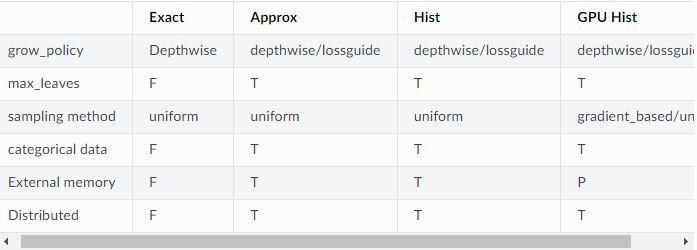

In [ ]:
# Other Updaters

# Prune - {"process_type": "update", "updater": "prune"}. With this set of parameters, during trianing, XGBOost will prune the existing trees according to 2 parameters min_split_loss (gamma) and max_depth.
# Refresh - {"process_type": "update", "updater": "refresh"}. Refresh the statistic of built trees on a new training dataset. When refresh_leaf is also set to true (default), XGBoost will update the leaf
#           value according to the new leaf weight, but the tree structure (split condition) itself doesn’t change.
# Sync: Synchronize the tree among workers when running distributed training.add()

# Feature Matrix
# Following table summarizes some differences in supported features between 4 tree methods, T means supported while F means unsupported.
# Features/parameters that are not mentioned here are universally supported for all 4 tree methods

from PIL import Image
jpgfile = Image.open("Feature Matrix.jpg")
jpgfile


3. Python Package

In [ ]:
bst_dart_tree.attributes()

{'best_iteration': '49', 'best_ntree_limit': '50'}

In [ ]:
bst_dart_tree.attr("best_iteration")

'49'

In [ ]:
bst_dart_tree.boost(d_train)  #this function should not be called directly by users.

In [ ]:
bst_copied = bst_dart_tree.copy()

In [ ]:
bst_copied.attr("best_iteration")

'49'

In [ ]:
bst_dart_tree.dump_model('bst_dart_tree', fmap='', with_stats=False, dump_format='json')
bst_dart_tree.dump_model('bst_dart_tree_txt', fmap='', with_stats=False, dump_format='text')
#check files bst_dart_tree*). The difference with save_model is that dumped cannot be loaded back to XGBoost. But they are more readable.

In [ ]:
bst_dart_tree.eval(d_test)
# Model Evaluation is the process through which we quantify the quality of a system’s predictions. To do this, we measure the newly trained model performance on a new and independent dataset. 
# This model will compare labeled data with it’s own predictions.

# The result mlogloss is chosen by objective, I suppose - https://russianblogs.com/article/3415977645/
# mlogloss - multi_logloss, for multiclass classification
# to check it try - bst_dart_tree.eval(d_train)  -> it is very small

#NB! model.evaluate predicts values and calculates losses and all attached metrics to the model for a given data set. It returns a list containing losses and indicators in one value.
# model.predict only predicts the output of the model taking into account the input data from the dataset. The inner workings of model.predict are used inside model.evaluate,
# but the result is different for both because they don't calculate the same thing.

'[0]\teval-mlogloss:0.15501930702012032'

In [23]:
lll = (d_test)
# If make an empty list - it works:) For later exploration.


In [24]:
# Under exlporation, again "'DMatrix' object is not iterable"
bst_dart.eval_set(lll, iteration=0, feval=None, output_margin=True)

TypeError: expected DMatrix, got float64

In [25]:
bst_dart.feature_names

In [26]:
bst_dart.feature_types

In [ ]:
bst_dart.get_dump()

['0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=0.142196536\n\t2:leaf=-0.0729230866\n',
 '0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=-0.0710982755\n\t2:[f3<1.75] yes=3,no=4,missing=3\n\t\t3:[f2<5.05000019] yes=5,no=6,missing=5\n\t\t\t5:leaf=0.141614899\n\t\t\t6:leaf=-0.0120000029\n\t\t4:[f2<4.85000038] yes=7,no=8,missing=7\n\t\t\t7:leaf=-2.55448485e-09\n\t\t\t8:leaf=-0.0703448355\n',
 '0:[f3<1.75] yes=1,no=2,missing=1\n\t1:[f2<5.05000019] yes=3,no=4,missing=3\n\t\t3:leaf=-0.0729230866\n\t\t4:leaf=0.0599999987\n\t2:[f2<4.85000038] yes=5,no=6,missing=5\n\t\t5:leaf=0.0428571403\n\t\t6:leaf=0.140689656\n',
 '0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=0.124300316\n\t2:leaf=-0.0702727735\n',
 '0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=-0.0684526488\n\t2:[f3<1.75] yes=3,no=4,missing=3\n\t\t3:[f2<5.05000019] yes=5,no=6,missing=5\n\t\t\t5:leaf=0.123795561\n\t\t\t6:leaf=-0.0117719937\n\t\t4:[f2<4.85000038] yes=7,no=8,missing=7\n\t\t\t7:leaf=-0.000381546823\n\t\t\t8:leaf=-0.

In [ ]:
bst_dart.get_fscore()
# get feature importance of each feature

{'f0': 48.0, 'f1': 28.0, 'f2': 274.0, 'f3': 102.0}

In [ ]:
bst_dart.get_score(importance_type='gain')

{'f0': 0.2706741392612457,
 'f1': 0.15894794464111328,
 'f2': 4.6904778480529785,
 'f3': 4.226516246795654}

In [ ]:
bst_dart.get_score(importance_type='weight')

{'f0': 48.0, 'f1': 28.0, 'f2': 274.0, 'f3': 102.0}

In [ ]:
bst_dart.get_score(importance_type='cover')

{'f0': 6.904836654663086,
 'f1': 3.9562931060791016,
 'f2': 20.159351348876953,
 'f3': 16.62445831298828}

In [ ]:
bst_dart.get_score(importance_type='total_gain')

{'f0': 12.992359161376953,
 'f1': 4.450542449951172,
 'f2': 1285.19091796875,
 'f3': 431.1046447753906}

In [ ]:
bst_dart.get_score(importance_type='total_cover')

{'f0': 331.4321594238281,
 'f1': 110.77620697021484,
 'f2': 5523.662109375,
 'f3': 1695.6947021484375}

In [ ]:
bst_dart.get_split_value_histogram('f0')

,SplitValue,Count
0,6.0375,34.0
1,6.2250,13.0
2,6.6000,1.0


In [ ]:
bst_dart.get_split_value_histogram('f1')

,SplitValue,Count
0,2.95,17.0
1,3.15,11.0


In [ ]:
bst_dart.get_split_value_histogram('f2')

,SplitValue,Count
0,2.99,100.0
1,5.15,174.0


In [ ]:
bst_dart.get_split_value_histogram('f3')

,SplitValue,Count
0,1.616667,13.0
1,1.750000,89.0


In [ ]:
bst_dart.inplace_predict(X_test)
#Run prediction in-place, Unlike predict() method, inplace prediction does not cache the prediction result.

array([1., 1., 0., 2., 1., 1., 0., 2., 0., 0., 1., 0., 1., 0., 2., 0., 0.,
       0., 2., 1., 2., 2., 0., 2., 0., 2., 0., 0., 2., 0.], dtype=float32)

In [ ]:
config = bst_dart.save_config()
#Output internal parameter configuration of Booster as a JSON string.

In [ ]:
bst_dart.load_config(config)
#Load configuration returned by save_config.

In [ ]:
config

'{"learner":{"generic_param":{"fail_on_invalid_gpu_id":"0","gpu_id":"-1","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"1"},"gradient_booster":{"dart_train_param":{"eta":"0.100000001","learning_rate":"0.100000001","normalize_type":"tree","one_drop":"0","rate_drop":"0.100000001","sample_type":"uniform","skip_drop":"0.5"},"gbtree":{"gbtree_model_param":{"num_parallel_tree":"1","num_trees":"150","size_leaf_vector":"0"},"gbtree_train_param":{"predictor":"auto","process_type":"default","tree_method":"exact","updater":"grow_colmaker,prune","updater_seq":"grow_colmaker,prune"},"name":"gbtree","specified_updater":false,"updater":{"grow_colmaker":{"colmaker_train_param":{"default_direction":"learn","opt_dense_col":"1"},"train_param":{"alpha":"0","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"1","eta":"0.100000001","gamma":"0","grow_policy":"depthwise","interaction_constraints":"","lambda":"1","learning

In [ ]:
model_load = xgb.Booster()

bst_dart.save_model("bst_dart.json")
model_load.load_model("bst_dart.json")

model_load.save_config()

'{"learner":{"generic_param":{"fail_on_invalid_gpu_id":"0","gpu_id":"-1","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"1"},"gradient_booster":{"dart_train_param":{"eta":"0.300000012","learning_rate":"0.300000012","normalize_type":"tree","one_drop":"0","rate_drop":"0","sample_type":"uniform","skip_drop":"0"},"gbtree":{"gbtree_model_param":{"num_parallel_tree":"1","num_trees":"150","size_leaf_vector":"0"},"gbtree_train_param":{"predictor":"auto","process_type":"default","tree_method":"auto","updater":"grow_colmaker,prune","updater_seq":"grow_colmaker,prune"},"name":"gbtree","specified_updater":false,"updater":{"grow_colmaker":{"colmaker_train_param":{"default_direction":"learn","opt_dense_col":"1"},"train_param":{"alpha":"0","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"1","eta":"0.300000012","gamma":"0","grow_policy":"depthwise","interaction_constraints":"","lambda":"1","learning_rate":"0.300

In [ ]:
bst_dart.get_score()

{'f0': 4.0, 'f2': 225.0, 'f3': 123.0}

In [ ]:
model_load.get_score()

{'f0': 4.0, 'f2': 225.0, 'f3': 123.0}

In [ ]:
model_load.num_boosted_rounds()
# Get number of boosted rounds. 

50

In [ ]:
model_load.num_features()

4

In [ ]:
bst_dart.save_raw()
# Save the model to a in memory buffer representation instead of file.

bytearray(b'binf\x00\x00\x00?\x04\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r\x00\x00\x00\x00\x00\x00\x00multi:softmax\x04\x00\x00\x00\x00\x00\x00\x00dart\x96\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
bst_dart.set_attr()
# Set the attribute of the Booster.

In [ ]:
bst_dart.set_param({'booster': 'dart'})
# Set parameters into the Booster. List of key,value pairs, dict of key to value or simply str key

In [ ]:
bst_dart.trees_to_dataframe()
# Convenient for exploration

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f2,2.45,0-1,0-2,0-1,54.040047,53.333328,NaN
1,0,1,0-1,Leaf,NaN,NaN,NaN,NaN,0.141176,15.999999,NaN
2,0,2,0-2,Leaf,NaN,NaN,NaN,NaN,-0.073043,37.333332,NaN
3,1,0,1-0,f3,1.75,1-1,1-2,1-1,15.358196,53.333328,NaN
4,1,1,1-1,f2,2.45,1-3,1-4,1-3,37.609993,36.444443,NaN
...,...,...,...,...,...,...,...,...,...,...,...
849,149,2,149-2,f3,1.75,149-3,149-4,149-3,0.271875,6.617074,NaN
850,149,3,149-3,f3,1.55,149-5,149-6,149-5,0.134648,2.987458,NaN
851,149,4,149-4,Leaf,NaN,NaN,NaN,NaN,0.041293,3.629617,NaN
852,149,5,149-5,Leaf,NaN,NaN,NaN,NaN,0.017834,1.516616,NaN


In [ ]:
bst_dart.update(d_train, 3)
#Update for one iteration, with objective function calculated internally. This function should not be called directly by users.

4. Learning API

In [ ]:
bst_dart = xgb.train()
bst_dart = xgb.cv()

#https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.train

5. Plotting API

In [ ]:
!pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------- ----- 41.0/47.0 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


<Axes: >

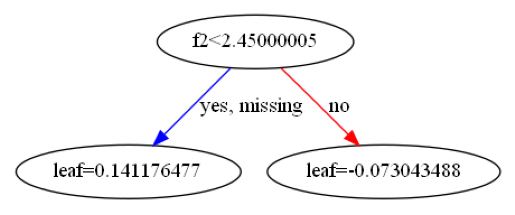

In [ ]:
import graphviz

xgb.plot_tree(bst_dart)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

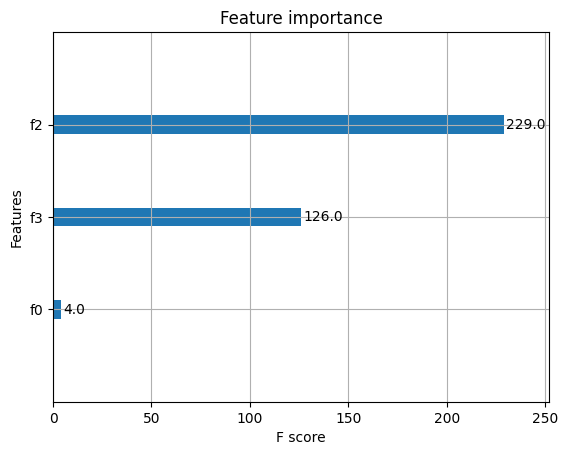

In [ ]:
xgb.plot_importance(bst_dart)

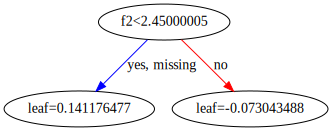

In [ ]:
xgb.to_graphviz(bst_dart)

6. Scikit-Learn API. XGBClassifier (commands are the same as XGBRegressor, XGBRanker, XGBRFRegressor, XGBRFClassifier)

In [28]:
# enable_categorical=True  is used in this method, so lets' check the main parameters.add()
from sklearn.metrics import mean_absolute_error


data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)

params = {'objective' : 'binary:logistic',
         'eval_metric': 'auc', # 'auc is Available for classification
         'booster': 'gbtree'}

#Full parameters are here - https://xgboost.readthedocs.io/en/stable/parameter.html

clf = xgb.XGBClassifier(**params) 

#!NB It works correctly with ** 

clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [29]:
clf.apply(X_train)

array([[ 1.,  5.,  3., ...,  0.,  1.,  2.],
       [ 2., 14.,  7., ...,  0.,  1.,  2.],
       [ 2., 10.,  8., ...,  0.,  2.,  2.],
       ...,
       [ 2.,  4.,  8., ...,  0.,  2.,  1.],
       [ 1.,  5.,  3., ...,  0.,  1.,  2.],
       [ 2., 11.,  3., ...,  0.,  1.,  1.]], dtype=float32)

In [30]:
len(clf.apply(X_train))
# Return the predicted leaf every tree for each sample. If the model is trained with early stopping, then best_iteration is used automatically.

120

In [ ]:
len(X_train)

120

In [ ]:
clf.best_iteration

99

In [31]:
clf.best_score
# Wil give a error: `best_score` in only defined when early stopping is used.

AttributeError: `best_score` in only defined when early stopping is used.

In [32]:
clf.coef_
# Will give an error: Coefficients are not defined for Booster type gbtree

AttributeError: Coefficients are not defined for Booster type gbtree

In [33]:
clf.evals_result()
# Will give an error: No evaluation result, `eval_set` is not used during training.

XGBoostError: No evaluation result, `eval_set` is not used during training.

In [34]:
clf.feature_importances_

array([0.01445714, 0.1228586 , 0.45032024, 0.412364  ], dtype=float32)

In [35]:
clf.feature_names_in_
# Will give an error: `feature_names_in_` is defined only when `X` has feature names that are all strings.

AttributeError: `feature_names_in_` is defined only when `X` has feature names that are all strings.

In [36]:
clf.get_booster

<bound method XGBModel.get_booster of XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)>

In [37]:
clf.get_num_boosting_rounds()

100

In [38]:
clf.get_params()
# Get parameters.

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [39]:
clf.get_xgb_params()
# Get xgboost specific parameters.

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': 'auc',
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [40]:
clf.intercept_
# Will get an error: Intercept (bias) is not defined for Booster type gbtree

AttributeError: Intercept (bias) is not defined for Booster type gbtree

In [ ]:
clf.save_model('xgb')

In [ ]:
clf.load_model('xgb')

In [ ]:
clf.n_features_in_
# Number of features seen during fit()

4

In [41]:
clf.score(X_test, y_test)

0.9666666666666667

In [42]:
clf.score(X_train, y_train)

1.0

In [ ]:
# Check it:
result = clf.predict(X_test)
y_test-result
# Bettter, then Booster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
clf.predict_proba(X_test)
# Predict the probability of each X example being of a given class.

array([[4.2406619e-03, 9.9460500e-01, 1.1543579e-03],
       [4.7916071e-03, 1.6562006e-02, 9.7864634e-01],
       [5.9714825e-03, 9.9224150e-01, 1.7869988e-03],
       [7.4994550e-03, 9.9074793e-01, 1.7526422e-03],
       [5.5593404e-04, 1.6078380e-03, 9.9783629e-01],
       [9.9295515e-01, 5.9482069e-03, 1.0966375e-03],
       [9.9295515e-01, 5.9482069e-03, 1.0966375e-03],
       [2.3180600e-02, 7.6385781e-02, 9.0043360e-01],
       [5.5586256e-04, 1.7362069e-03, 9.9770796e-01],
       [1.1267266e-02, 7.9020822e-01, 1.9852450e-01],
       [5.5543910e-04, 2.4966791e-03, 9.9694794e-01],
       [5.3559552e-04, 9.5154799e-04, 9.9851280e-01],
       [9.9295515e-01, 5.9482069e-03, 1.0966375e-03],
       [2.9472618e-03, 9.9302238e-01, 4.0303427e-03],
       [5.5543910e-04, 2.4966791e-03, 9.9694794e-01],
       [5.5586256e-04, 1.7362069e-03, 9.9770796e-01],
       [9.9295515e-01, 5.9482069e-03, 1.0966375e-03],
       [7.4994550e-03, 9.9074793e-01, 1.7526422e-03],
       [5.5543910e-04, 2.496

In [ ]:
clf.set_params()

# set_params(**params). Modification of the sklearn method to allow unknown kwargs. This allows using the full range of
# xgboost parameters that are not defined as member variables in sklearn grid search.

In [ ]:
#Examples lins - https://xgboost.readthedocs.io/en/stable/python/examples/index.html